In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2020-12-31'

# Fetch historical stock data using Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Adj Close']]], **{})
chart

In [ ]:
#We, are importing Libraries and fetch the total stock data.

In [ ]:
# Extract the 'Close' price for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


In [ ]:
# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of previous days to use for prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Display the shape of the training and testing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((2204, 10, 1), (2204, 1), (544, 10, 1), (544, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
69/69 [==============================] - 2s 4ms/step - loss: 0.0043
Epoch 2/10
69/69 [==============================] - 0s 4ms/step - loss: 3.6889e-05
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 2.9672e-05
Epoch 4/10
69/69 [==============================] - 0s 4ms/step - loss: 3.1163e-05
Epoch 5/10
69/69 [==============================] - 0s 4ms/step - loss: 2.9347e-05
Epoch 6/10
69/69 [==============================] - 0s 4ms/step - loss: 3.1217e-05
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 2.9261e-05
Epoch 8/10
69/69 [==============================] - 0s 4ms/step - loss: 2.9370e-05
Epoch 9/10
69/69 [==============================] - 0s 4ms/step - loss: 2.7889e-05
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 2.8474e-05


In [ ]:
#We, simply build and train the LSTM MOdel.

17/17 [==============================] - 0s 2ms/step


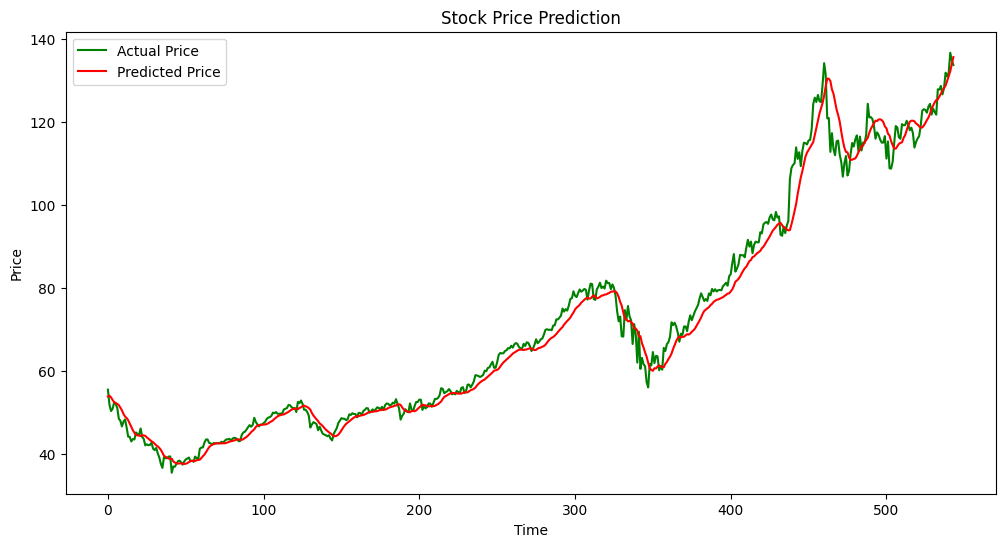

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled data
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='green')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#This code will fetch historical stock data for a given company (in this case, AAPL),
#preprocess the data, build an LSTM model, train it, make predictions, and plot the actual vs. predicted prices.